In [1]:
import numpy as np

from cleanplots import * 

In [2]:
psf_names = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
psf_names_nice = ['One Lenslet', 'Two Lenslet', 'Three Lenslet', 'Four Lenslet', 'Five Lenslet', 'Six Lenslet', 'Seven Lenslet', 'Eight Lenslet', 'Nine Lenslet']

# set eligible bead sparsity levels
sparsity_levels = [0.008, 0.009, 0.01, 0.012, 0.013, 0.014, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15] #, 0.5]
# set dataset size 
num_x = 96
num_y = 96
num_bead_imgs = 50000
# MI estimator parameters 
patch_size = 32
num_patches = 10000
val_set_size = 1000
test_set_size = 1500 
num_samples = 8
learning_rate = 1e-3
num_iters_per_epoch = 500
patience_val = 20
mean_photon_count = 100 

In [3]:
sigma_value = 5

In [4]:
figure_dir = '/home/lakabuli/workspace/LenslessInfoDesign/figures/'

### Load Object TCs - use full object TCs

In [5]:
tc_dir = '/home/lakabuli/workspace/LenslessInfoDesign/tradeoff_analysis/tc_values/bead_tc_values/'

{'full': [np.float32(1.3588215), np.float32(0.016813619)], 'crop': [np.float32(1.3685265), np.float32(0.13535927)]}
{'full': [np.float32(1.3179525), np.float32(0.016410327)], 'crop': [np.float32(1.3239619), np.float32(0.12261661)]}
{'full': [np.float32(1.278587), np.float32(0.01606197)], 'crop': [np.float32(1.2817489), np.float32(0.111764856)]}
{'full': [np.float32(1.2196074), np.float32(0.015450943)], 'crop': [np.float32(1.2193334), np.float32(0.09765958)]}
{'full': [np.float32(1.1944333), np.float32(0.015201833)], 'crop': [np.float32(1.1928512), np.float32(0.092288256)]}
{'full': [np.float32(1.1691554), np.float32(0.014943333)], 'crop': [np.float32(1.1667233), np.float32(0.087159514)]}
{'full': [np.float32(1.1484342), np.float32(0.0147269275)], 'crop': [np.float32(1.1453289), np.float32(0.083182015)]}
{'full': [np.float32(1.0641085), np.float32(0.013903436)], 'crop': [np.float32(1.0588373), np.float32(0.06842167)]}
{'full': [np.float32(1.003684), np.float32(0.013129478)], 'crop': [np

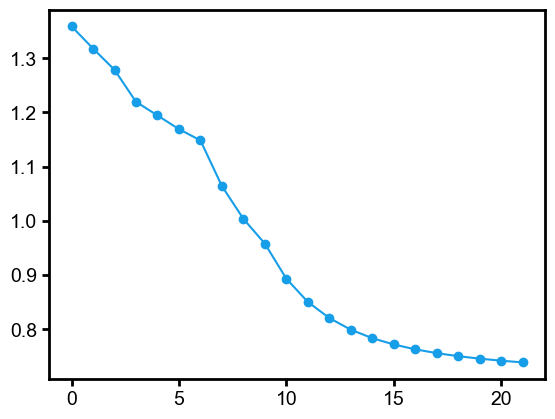

In [6]:
object_tcs = []
for sparsity in sparsity_levels: 
    object_path = tc_dir + 'tamura_values_object_{}_sparsity_{}_photons.npy'.format(sparsity, mean_photon_count)
    object_tc = np.load(object_path, allow_pickle=True).item()
    tamura_value = object_tc['full'][0]
    object_tcs.append(tamura_value)
    print(object_tc)
object_tcs = np.array(object_tcs)
plt.plot(object_tcs, '-o')

In [7]:
print(sparsity_levels)
print(object_tcs)

[0.008, 0.009, 0.01, 0.012, 0.013, 0.014, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]
[1.3588215  1.3179525  1.278587   1.2196074  1.1944333  1.1691554
 1.1484342  1.0641085  1.003684   0.957902   0.8931782  0.8503194
 0.82055783 0.7990492  0.78345203 0.77175367 0.7628077  0.7557686
 0.7501579  0.74558204 0.7418257  0.7386448 ]


### Load Measurement TCs - use noisy patch TC with read noise version

In [8]:
tc_dir = '/home/lakabuli/workspace/LenslessInfoDesign/tradeoff_analysis/tc_values/bead_tc_values/'

In [9]:
sparsities_and_tcs = []
for sparsity in sparsity_levels:
    tc_across_psfs = [] 
    for psf in psf_names: 
        tc_path = tc_dir + 'tamura_values_{}_sparsity_{}_photons_{}_sigma_{}_psf.npy'.format(sparsity, mean_photon_count, sigma_value, psf)
        tc = np.load(tc_path, allow_pickle=True).item()
        tc_value = tc['patch_noisy'][0] 
        print("TC value for sparsity {} and PSF {} is {}".format(sparsity, psf, tc_value))
        tc_across_psfs.append(tc_value)
    sparsities_and_tcs.append(tc_across_psfs)
sparsities_and_tcs = np.array(sparsities_and_tcs)

TC value for sparsity 0.008 and PSF one is 1.244372877362399
TC value for sparsity 0.008 and PSF two is 1.032541296077097
TC value for sparsity 0.008 and PSF three is 0.9333621598998733
TC value for sparsity 0.008 and PSF four is 0.8720616866064395
TC value for sparsity 0.008 and PSF five is 0.8329304761380505
TC value for sparsity 0.008 and PSF six is 0.8075769697338303
TC value for sparsity 0.008 and PSF seven is 0.7905038821137781
TC value for sparsity 0.008 and PSF eight is 0.7785564650057928
TC value for sparsity 0.008 and PSF nine is 0.7691813376354687
TC value for sparsity 0.009 and PSF one is 1.2054752126545663
TC value for sparsity 0.009 and PSF two is 1.0015082407936726
TC value for sparsity 0.009 and PSF three is 0.9080585935558348
TC value for sparsity 0.009 and PSF four is 0.8518401118886828
TC value for sparsity 0.009 and PSF five is 0.8168534212019068
TC value for sparsity 0.009 and PSF six is 0.7945658803623953
TC value for sparsity 0.009 and PSF seven is 0.779753566848

### Load MI sweeps

In [10]:
mi_dir = '/home/lakabuli/workspace/LenslessInfoDesign/tradeoff_analysis/mi_estimates/bead_mi_estimates/'

In [11]:
sparsities_and_mis = []
sparsities_and_lowers = []
sparsities_and_uppers = []
for sparsity in sparsity_levels:
    mi_across_psfs = []
    lowers_across_psfs = []
    uppers_across_psfs = []
    for psf in psf_names:
        mi_path = mi_dir + 'pixelcnn_mi_estimate_{}_sparsity_{}_photons_{}_sigma_{}_psf_{}_lr_{}_patience_{}_steps_per_epoch.npy'.format(sparsity, mean_photon_count, sigma_value, psf, learning_rate, patience_val, num_iters_per_epoch)
        mi_estimates = np.load(mi_path)
        print('MI estimate for sparsity level {} and PSF {} and sigma {} is {}'.format(sparsity, psf, sigma_value, mi_estimates))
        best_mi_value, best_mi_idx = np.min(mi_estimates[0]), np.argmin(mi_estimates[0])
        best_mi_lower_bound = mi_estimates[1][best_mi_idx]
        best_mi_upper_bound = mi_estimates[2][best_mi_idx]
        mi_across_psfs.append(best_mi_value)
        lowers_across_psfs.append(best_mi_lower_bound)
        uppers_across_psfs.append(best_mi_upper_bound)
    sparsities_and_mis.append(mi_across_psfs)
    sparsities_and_lowers.append(lowers_across_psfs)
    sparsities_and_uppers.append(uppers_across_psfs)
sparsities_and_mis = np.array(sparsities_and_mis)
sparsities_and_lowers = np.array(sparsities_and_lowers)
sparsities_and_uppers = np.array(sparsities_and_uppers)

MI estimate for sparsity level 0.008 and PSF one and sigma 5 is [[0.16898003 0.16636176 0.16252758 0.17328957 0.17210186]
 [0.16514688 0.16223452 0.15898646 0.17010823 0.16746899]
 [0.17269485 0.16981311 0.16695373 0.17775011 0.17678907]]
MI estimate for sparsity level 0.008 and PSF two and sigma 5 is [[0.25445265 0.25070549 0.25101094 0.26401248 0.25318136]
 [0.25110381 0.24665358 0.24652872 0.25956707 0.24719464]
 [0.25879212 0.25419605 0.25585775 0.26881527 0.2582545 ]]
MI estimate for sparsity level 0.008 and PSF three and sigma 5 is [[0.30378691 0.30470529 0.30593016 0.31464211 0.31034254]
 [0.29913065 0.29981067 0.30070601 0.31015061 0.30430148]
 [0.30793066 0.30867397 0.31032466 0.31912501 0.3170564 ]]
MI estimate for sparsity level 0.008 and PSF four and sigma 5 is [[0.38648649 0.38966266 0.38789812 0.40168666 0.39698947]
 [0.38244042 0.38406841 0.38191656 0.39522011 0.39048818]
 [0.39144818 0.39511657 0.39322958 0.40705011 0.40351861]]
MI estimate for sparsity level 0.008 and 

MI estimate for sparsity level 0.009 and PSF four and sigma 5 is [[0.41442438 0.41829364 0.42197717 0.43275945 0.42793912]
 [0.41013272 0.41349739 0.41649711 0.42617423 0.42127892]
 [0.41958695 0.4234717  0.4280829  0.43881049 0.43466433]]
MI estimate for sparsity level 0.009 and PSF five and sigma 5 is [[0.4893242  0.49322752 0.48918764 0.50233503 0.48573664]
 [0.48452313 0.48789846 0.48280399 0.49637411 0.47855671]
 [0.49460923 0.49905945 0.49576839 0.50857697 0.49221248]]
MI estimate for sparsity level 0.009 and PSF six and sigma 5 is [[0.54495061 0.54355308 0.54564852 0.5505514  0.54172766]
 [0.54044742 0.5379719  0.5389037  0.54392009 0.53424607]
 [0.55085099 0.55004405 0.55384831 0.5565216  0.54828983]]
MI estimate for sparsity level 0.009 and PSF seven and sigma 5 is [[0.59664378 0.59594863 0.59248352 0.61211809 0.59340328]
 [0.59088305 0.58957564 0.58540231 0.60467399 0.58403126]
 [0.60256583 0.60160926 0.60037752 0.61958833 0.60108231]]
MI estimate for sparsity level 0.009 and

### Make actual figure with perceptual colormap: Fig. S4a

In [12]:
inferno = plt.cm.get_cmap('inferno', 11) # max photon count value, using each tick point smoothly gives a better color gradient that isn't uniform
colors = [inferno(i) for i in [1, 2, 3, 4, 5, 6, 7, 8, 9]]

axis_label_fontsize = 21
title_fontsize = 23
tick_fontsize = 19
legend_fontsize = 16
star_size = 18
error_bar_transparency = 0.15

/tmp/ipykernel_3836063/2299809711.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  inferno = plt.cm.get_cmap('inferno', 11) # max photon count value, using each tick point smoothly gives a better color gradient that isn't uniform


Sensor sparsity for PSF One Lenslet is 0.7379229341424477 and MI is 0.9067016712568416
Sensor sparsity for PSF Two Lenslet is 0.7417986250688393 and MI is 0.8798018648353898
Sensor sparsity for PSF Three Lenslet is 0.7418688200007758 and MI is 0.8729734656655328
Sensor sparsity for PSF Four Lenslet is 0.7410106767179664 and MI is 0.8776434825670615
Sensor sparsity for PSF Five Lenslet is 0.7420624387718513 and MI is 0.8820912978836755
Sensor sparsity for PSF Six Lenslet is 0.7418899390662561 and MI is 0.8782065537659863
Sensor sparsity for PSF Seven Lenslet is 0.7437019463210583 and MI is 0.8733308456140257
Sensor sparsity for PSF Eight Lenslet is 0.7406762271864544 and MI is 0.8664037284025735
Sensor sparsity for PSF Nine Lenslet is 0.7437620957844449 and MI is 0.8615600090236734


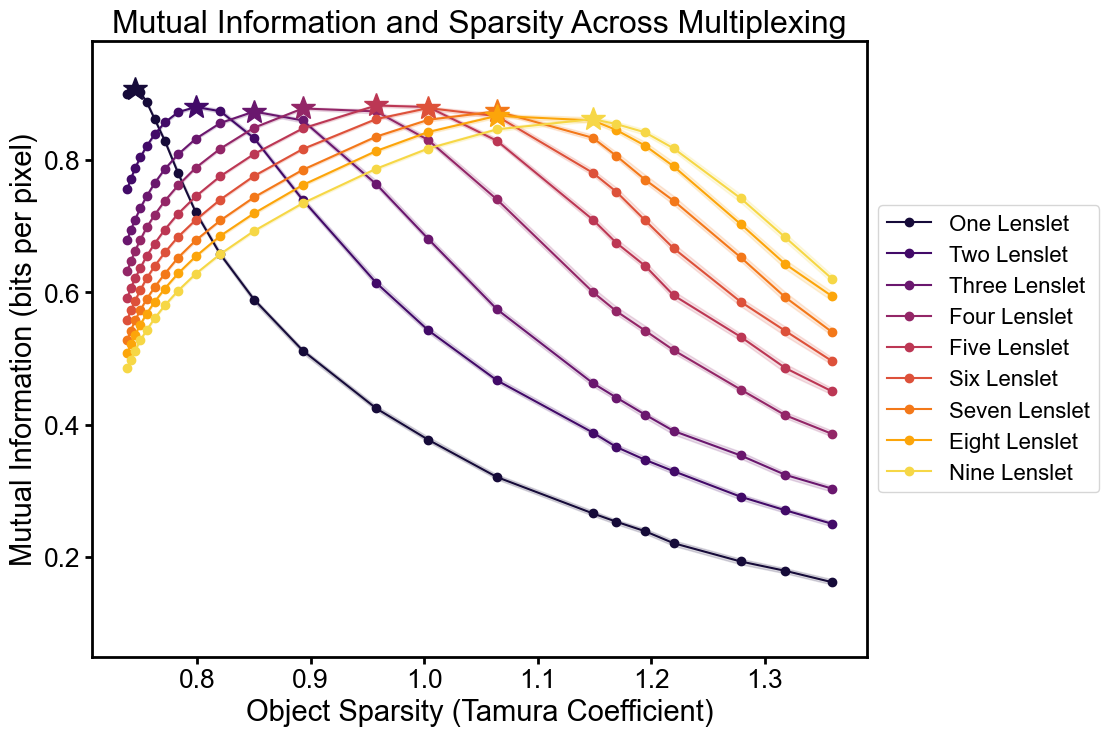

In [13]:
plt.figure(figsize=(10, 8))
for psf_idx in range(9):
    plt.plot(object_tcs, sparsities_and_mis[:, psf_idx], '-o', label=psf_names_nice[psf_idx], color=colors[psf_idx])
    plt.fill_between(object_tcs, sparsities_and_lowers[:, psf_idx], sparsities_and_uppers[:, psf_idx], alpha=error_bar_transparency, color=colors[psf_idx])
    y_coord_idx = np.argmax(sparsities_and_mis[:, psf_idx])
    y_coord = sparsities_and_mis[y_coord_idx, psf_idx]
    x_coord = object_tcs[y_coord_idx]
    plt.plot(x_coord, y_coord, '*', color=colors[psf_idx], markersize=star_size)
    print("Sensor sparsity for PSF {} is {} and MI is {}".format(psf_names_nice[psf_idx], sparsities_and_tcs[y_coord_idx, psf_idx], y_coord))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=legend_fontsize)
plt.xlabel('Object Sparsity (Tamura Coefficient)', fontsize=axis_label_fontsize)
plt.ylabel('Mutual Information (bits per pixel)', fontsize=axis_label_fontsize)
plt.ylim([0.05, 0.98])
#plt.xlim([0.65, 1.39])
plt.xticks([0.8, 0.9, 1.0, 1.1, 1.2, 1.3], size=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.title("Mutual Information and Sparsity Across Multiplexing", size=title_fontsize)
plt.savefig(figure_dir + 'mi_vs_sparsity_2D_read_noise.pdf', transparent=True, bbox_inches='tight')

### Plot of Object Sparsity vs. Measurement TC: Fig. S4b

Sensor sparsity for PSF One Lenslet is 0.7379229341424477 and MI is 0.9067016712568416
Sensor sparsity for PSF Two Lenslet is 0.7417986250688393 and MI is 0.8798018648353898
Sensor sparsity for PSF Three Lenslet is 0.7418688200007758 and MI is 0.8729734656655328
Sensor sparsity for PSF Four Lenslet is 0.7410106767179664 and MI is 0.8776434825670615
Sensor sparsity for PSF Five Lenslet is 0.7420624387718513 and MI is 0.8820912978836755
Sensor sparsity for PSF Six Lenslet is 0.7418899390662561 and MI is 0.8782065537659863
Sensor sparsity for PSF Seven Lenslet is 0.7437019463210583 and MI is 0.8733308456140257
Sensor sparsity for PSF Eight Lenslet is 0.7406762271864544 and MI is 0.8664037284025735
Sensor sparsity for PSF Nine Lenslet is 0.7437620957844449 and MI is 0.8615600090236734


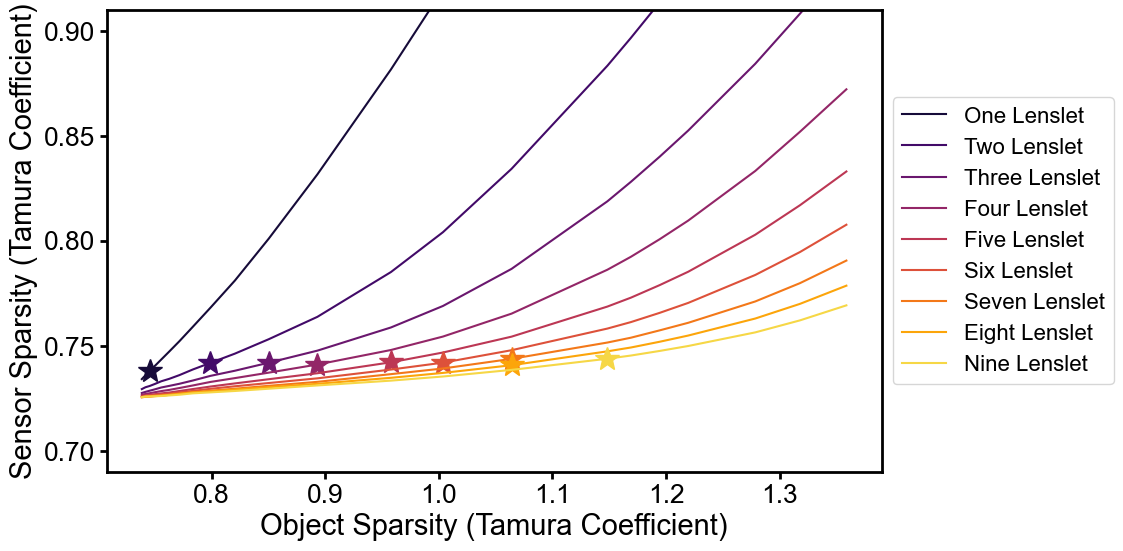

In [14]:
plt.figure(figsize=(10, 6))
# plot in terms of tamura 
for psf_idx in range(9):
    plt.plot(object_tcs, sparsities_and_tcs[:, psf_idx], label=psf_names_nice[psf_idx], color=colors[psf_idx])
    y_coord_idx = np.argmax(sparsities_and_mis[:, psf_idx])
    y_coord = sparsities_and_tcs[y_coord_idx, psf_idx]
    x_coord = object_tcs[y_coord_idx]
    plt.plot(x_coord, y_coord, '*', color=colors[psf_idx], markersize=star_size)
    print("Sensor sparsity for PSF {} is {} and MI is {}".format(psf_names_nice[psf_idx], y_coord, sparsities_and_mis[y_coord_idx, psf_idx]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=legend_fontsize)
plt.xlabel('Object Sparsity (Tamura Coefficient)', fontsize=axis_label_fontsize)
plt.ylabel('Sensor Sparsity (Tamura Coefficient)', fontsize=axis_label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.ylim([0.69, 0.91])
plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9],size=tick_fontsize)
plt.xticks([0.8, 0.9, 1.0, 1.1, 1.2, 1.3], size=tick_fontsize)
plt.savefig(figure_dir + 'sensor_vs_object_sparsity_2D_read_noise.pdf', transparent=True, bbox_inches='tight')